In [1]:
from body_matrix import load
from body_matrix import infer
from body_matrix import process
from body_matrix import draw

video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Body_Matrixes/samples/man_01.mp4", 
    90, 
    1
)

keypoints_model, keypoints_transform = load.keypoints_model("cpu")
boxes, keypoints = infer.detect_main_target(
    sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)

selected_kps = process.keypoints_filter(
    [
        'left_shoulder','right_shoulder',
        'left_hip','right_hip', 
        'left_wrist','right_wrist',
        'left_ankle', 'right_ankle'
    ], 
    keypoints
)

Found  1  person in the frame
Distances:  [36.484947204589844]
Areas:  [189190.37870431272]
FOCUSES:  [5185.436548487382]
Select keypoint index 0


In [2]:
selected_kps

{'left_shoulder': [237.32237243652344, 588.5149536132812],
 'right_shoulder': [373.31524658203125, 585.63671875],
 'left_wrist': [245.941650390625, 757.3711547851562],
 'right_wrist': [427.9039611816406, 795.7474975585938],
 'left_hip': [268.9263610839844, 811.0980834960938],
 'right_hip': [359.9075012207031, 812.0574951171875],
 'left_ankle': [290.953369140625, 1155.5263671875],
 'right_ankle': [349.37286376953125, 1105.6370849609375]}

In [3]:
for index, value in enumerate(selected_kps.values()):
    print(index, value)

0 [237.32237243652344, 588.5149536132812]
1 [373.31524658203125, 585.63671875]
2 [245.941650390625, 757.3711547851562]
3 [427.9039611816406, 795.7474975585938]
4 [268.9263610839844, 811.0980834960938]
5 [359.9075012207031, 812.0574951171875]
6 [290.953369140625, 1155.5263671875]
7 [349.37286376953125, 1105.6370849609375]


[237.32237243652344, 588.5149536132812]
[373.31524658203125, 585.63671875]
[245.941650390625, 757.3711547851562]
[427.9039611816406, 795.7474975585938]
[268.9263610839844, 811.0980834960938]
[359.9075012207031, 812.0574951171875]
[290.953369140625, 1155.5263671875]
[349.37286376953125, 1105.6370849609375]


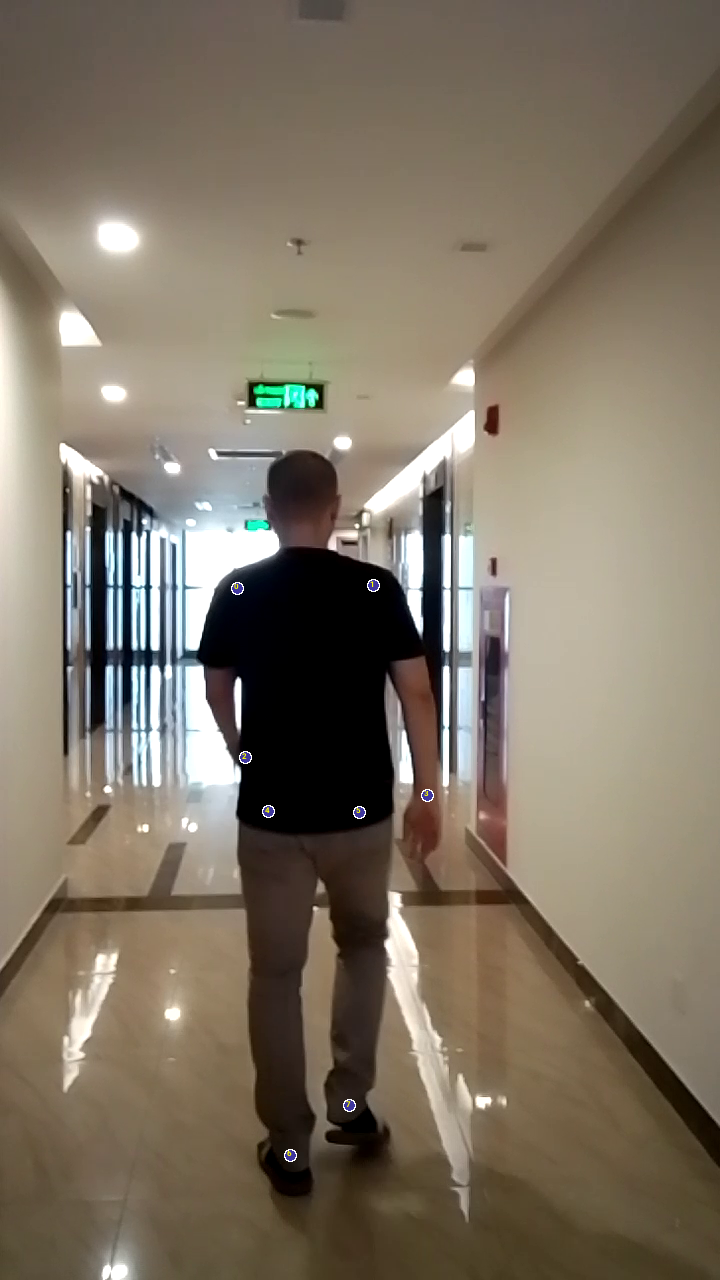

In [4]:
output = draw.keypoint_markers(
    coordinates=selected_kps,
    image=sample_frame, 
    label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf"
)

output

In [5]:
from body_matrix import measure 

middle_hip = measure.find_middle_point(
    selected_kps['left_hip'], 
    selected_kps['right_hip']
)

middle_shoulder = measure.find_middle_point(
    selected_kps['left_shoulder'], 
    selected_kps['right_shoulder']
)

middle_back = measure.find_middle_point(
    middle_shoulder, 
    middle_hip
)

middle_back

(309.86787033081055, 699.3268127441406)

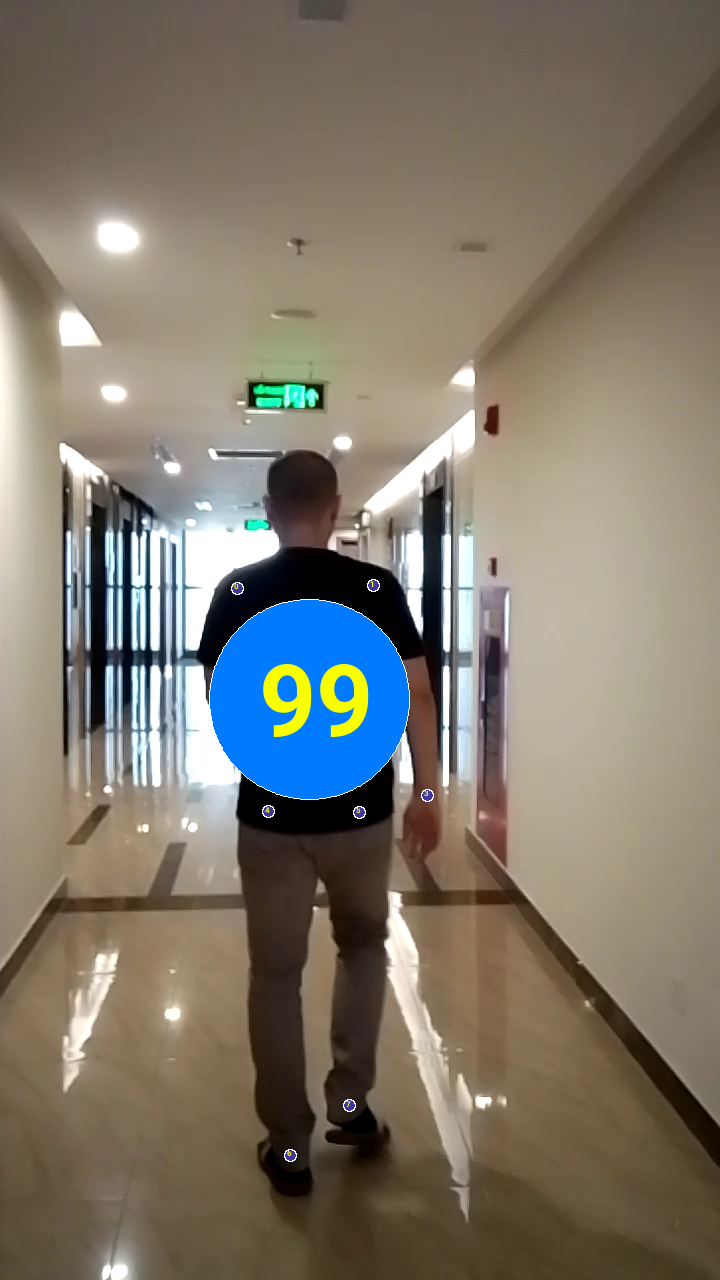

In [6]:
updated_sample = draw.circle_label(
    image=output, 
    radius = 100,
    central_point=middle_back,
    background_color = "#007AFF", 
    label= "99", 
    label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf", 
    label_color ="#FAFF00"
)
updated_sample

In [7]:
rect_sample = draw.fixed_rectangle_label(
    image=output, 
    anchor_point=[output.width/2, 100], 
    label_text="21-02-1990",
    label_size=30, 
    label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf", 
    label_color ="#FFFFFF",
    background_color = "#11114A"
)

In [8]:
selected_kps['left_shoulder']

[237.32237243652344, 588.5149536132812]

In [9]:
selected_kps['right_hip']

[359.9075012207031, 812.0574951171875]

In [10]:
new_sample = draw.connecting_line(
    image=rect_sample, 
    pointA=selected_kps['left_shoulder'],
    pointB=selected_kps['right_hip'],
    line_color="white", 
    line_width=12
)

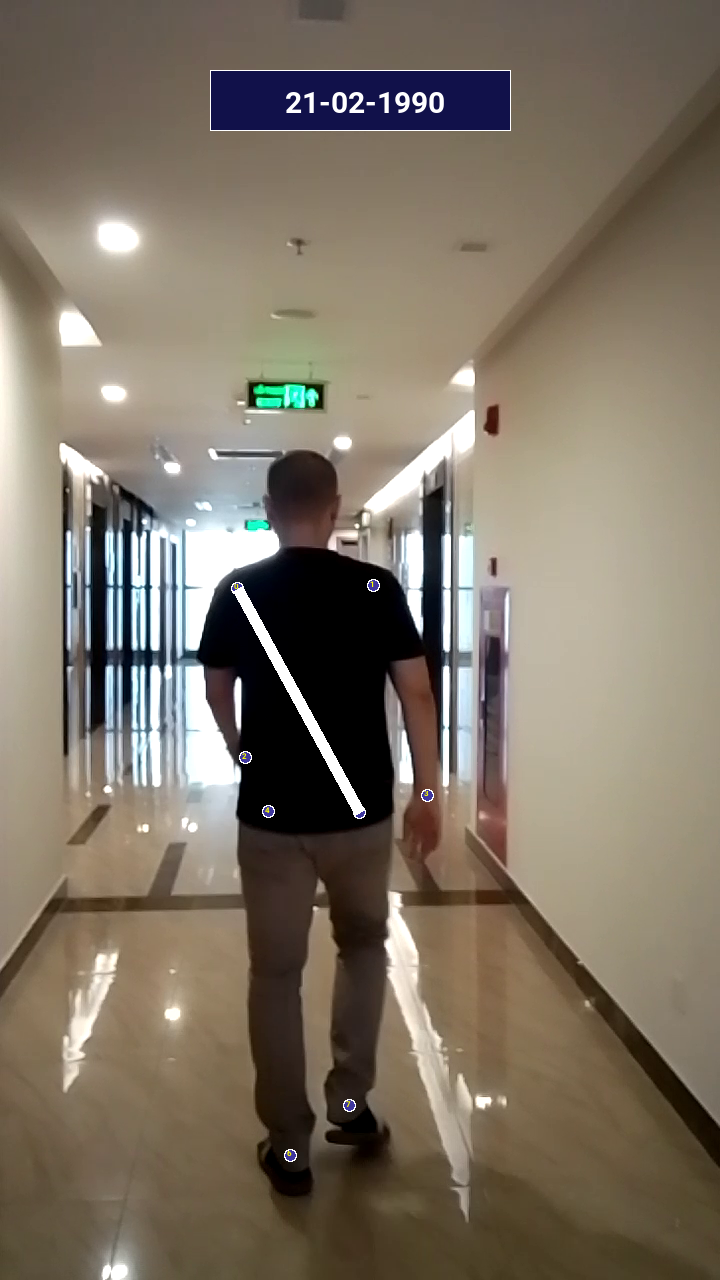

In [11]:
new_sample

In [15]:
selected_kps['right_shoulder']

[373.31524658203125, 585.63671875]

In [23]:
final_sample = rect_sample
for key, value in selected_kps.items():
    print(key, value)
    final_sample = draw.floating_rectangle_label(
        image=final_sample, 
        longitude_coordinate=middle_back[0],
        point=value, 
        label_text=key, 
        label_size=12, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    )    

left_shoulder [237.32237243652344, 588.5149536132812]
right_shoulder [373.31524658203125, 585.63671875]
left_wrist [245.941650390625, 757.3711547851562]
right_wrist [427.9039611816406, 795.7474975585938]
left_hip [268.9263610839844, 811.0980834960938]
right_hip [359.9075012207031, 812.0574951171875]
left_ankle [290.953369140625, 1155.5263671875]
right_ankle [349.37286376953125, 1105.6370849609375]


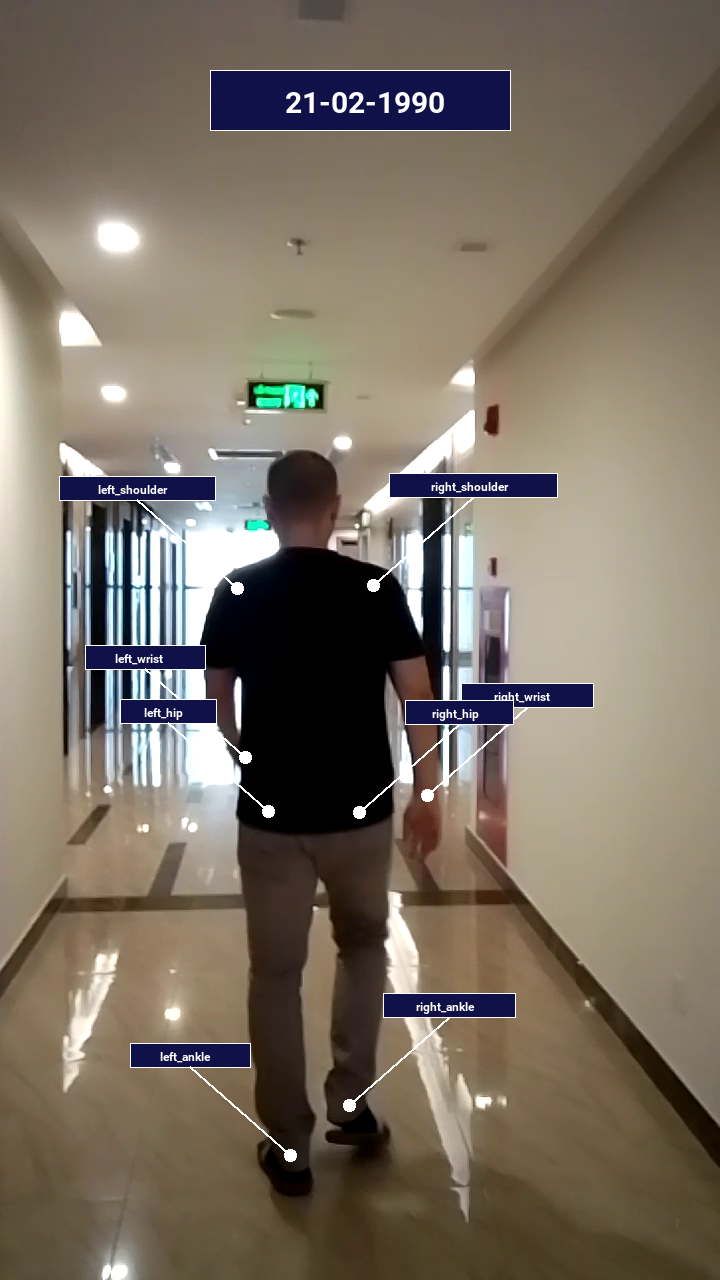

In [24]:
final_sample